<a href="https://colab.research.google.com/github/Thrcordeiro/AprenizagemDeMaquina/blob/main/AprendizagemDeMaquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##UNIVERSIDADE FEDERAL DE PERNAMBUCO
ESPECIALIZAÇÃO EM CIÊNCIA DE DADOS

Aprendizagem de Máquina

##Thaina Mariah Ramos Cordeiro

Questão 1 -
 Usando a base de dados Porto Seguro’s Safe Driver Prediction

1 para estimar quando um

cliente irá acionar o seguro nos próximos 12 meses, pede-se:

(a) Gere bases de treinamento, validação, e teste balanceadas realizando
sub-amostragem da classe mais numerosa;

(b) Considerando os atributos binários da base de dados como categóricos, avalie:

(i) as taxas de acerto obtidas na base de teste com Regressão Logística e
K-vizinhos mais próximos considerando apenas os atributos numéricos;

(ii) as taxas de acerto obtidas na base de teste com Naive Bayes e Árvore de
Decisão considerando apenas os atributos categóricos;

(iii) a taxa de acerto obtida com Random Forest na base de teste considerando
todos os atrbutos da base de dados;

(iv) Quais as taxas de erro em (i), (ii), e (iii) considerando intervalo de confiança e confiabilidade de 90%?

## Importação de Libs

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

from keras.models import Sequential
from keras.layers import Dense


In [ ]:
df = pd.read_csv('/train.csv')

In [ ]:
df.sample(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
573489,1433904,0,0,1,6,0,0,0,0,0,...,4,4,5,7,0,0,0,0,0,0
446231,1115107,0,7,1,4,1,0,0,0,0,...,4,2,1,9,0,1,0,0,0,0
444979,1111979,0,0,2,1,1,0,0,1,0,...,3,1,2,6,0,1,1,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
df1 = df.copy()

In [ ]:
df1.shape

(595212, 59)

In [ ]:
df1.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [ ]:
# Filtrando dados binarios e categóricos

df1 = df1.drop(columns=['id', 'target', 'ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02', 'ps_reg_03','ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09','ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'], axis=1)

In [ ]:
df1.columns

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin',
       'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',
       'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

In [ ]:
# Gerando bases de treinamento, validação, e teste balanceadas, sendo realizado sub-amostragem da classe mais numerosa.

X = df1
y = df.target

In [ ]:
# Criando base de validação
X, X_val, y, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criando base de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Balanceamento de dados
#Aplicando UnderSampling
seed = 6
np.random.seed(seed)

## SMOTE
rus = SMOTE(random_state=seed)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
X_rus.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,...,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,0,0,0,1,0,0,0,0,0,...,1,2,1,104,0,0,1,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,1,0,1,80,0,0,1,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,1,1,1,104,0,1,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,1,2,1,104,0,1,0,1,1,0
4,1,1,0,1,0,0,0,0,0,0,...,1,0,1,19,0,1,1,0,0,1


# Regressão Logística e KNN

In [ ]:
# Preparação do DataSet

X_rus.columns

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin',
       'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',
       'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

In [ ]:
X_rus_1 = X_rus.drop(columns=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat','ps_car_01_cat', 'ps_car_02_cat','ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat','ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat','ps_car_11_cat'], axis=1)

In [ ]:
X_test_1 = X_test.drop(columns=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat','ps_car_01_cat', 'ps_car_02_cat','ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat','ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat','ps_car_11_cat'], axis=1)

### Regressão Logistica

In [ ]:
y_rus_1 = y_rus

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
model_lg.fit(X_rus_1,y_rus_1)

LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
y_pred_lg = model_lg.predict(X_test_1)
print(y_pred_lg)

[1 0 0 ... 0 0 0]


------------------------------------------------------
0.5056264542448332


,Modelo,Accuracia,Recall,ROC AUC
0,Logistic Regression,0.845123,0.139972,0.505626


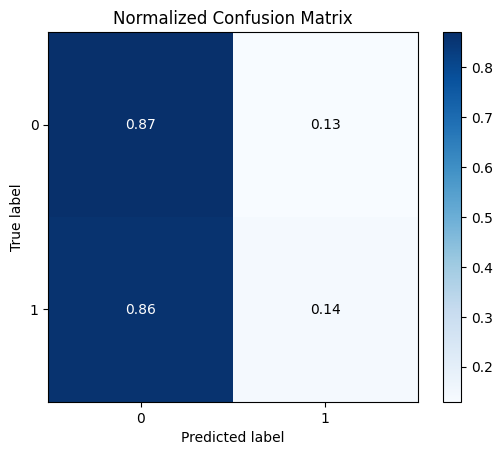

In [ ]:
  #Models metrics
print('------------------------------------------------------')
#print(classification_report(y_test, y_pred_lg))
print(roc_auc_score(y_test, y_pred_lg))
#print(confusion_matrix(y_test, y_pred_lg))

skplt.metrics.plot_confusion_matrix(y_test, y_pred_lg, normalize=True);
aa = 'Logistic Regression'
a = accuracy_score(y_test, y_pred_lg)
b = recall_score(y_test, y_pred_lg)
c = roc_auc_score(y_test, y_pred_lg)

details = {
'Modelo':[aa],
'Accuracia' : [a],
'Recall' : [b],
'ROC AUC' : [c],
}

    # creating a Dataframe object
result_lg = pd.DataFrame(details)
result_lg

###  KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_rus_1, y_rus_1)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(neigh.kneighbors([[1., 1., 1.,1., 1., 1.,1., 1., 1.,1., 1., 1.,1., 1., 1.,1., 1.]]))

(array([[2.64575131, 2.64575131, 2.82842712]]), array([[324277, 347190,  22344]], dtype=int64))


In [ ]:
y_pred_knn = neigh.predict(X_test_1)
print(y_pred_knn)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

In [ ]:
  #Models metrics
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dt, digits=3))
#print(classification_report(y_test, y_pred_knn))
print(roc_auc_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=True);
aa = 'KNN'
a = accuracy_score(y_test, y_pred_knn)
b = recall_score(y_test, y_pred_knn)
c = roc_auc_score(y_test, y_pred_knn)

details = {
'Modelo':[aa],
'Accuracia' : [a],
'Recall' : [b],
'ROC AUC' : [c],
}

    # creating a Dataframe object
result_knn = pd.DataFrame(details)
result_knn

## Naive Bayes e Árvore de Decisão

Considerando apenas os atributos categóricos

### Preparação dos Dados

In [ ]:
X_rus_2 = X_rus.drop(columns=['ps_ind_06_bin','ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin','ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin','ps_ind_17_bin', 'ps_ind_18_bin','ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin','ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'], axis=1)

In [ ]:
X_test_2 = X_test.drop(columns=['ps_ind_06_bin','ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin','ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin','ps_ind_17_bin', 'ps_ind_18_bin','ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin','ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'], axis=1)

### Arvore de Decisão

In [ ]:
y_rus_2 = y_rus

In [ ]:
DT = DecisionTreeClassifier(max_depth=9)
DT.fit(X_rus_2, y_rus_2)

y_pred_dt = DT.predict(X_test_2)

Relatório de Classificação:
               precision    recall  f1-score   support

           0      0.966     0.656     0.782    114716
           1      0.041     0.392     0.075      4327

    accuracy                          0.647    119043
   macro avg      0.504     0.524     0.428    119043
weighted avg      0.933     0.647     0.756    119043



,Modelo,Accuracia,Recall,ROC AUC
0,ArvoreDecisão,0.646817,0.391726,0.524082


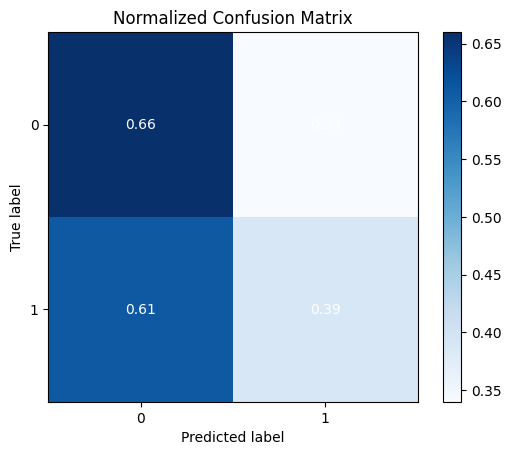

In [ ]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dt, digits=3))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True);

aa = 'ArvoreDecisão'
a = accuracy_score(y_test, y_pred_dt)
b = recall_score(y_test, y_pred_dt)
c = roc_auc_score(y_test, y_pred_dt)

details = {
'Modelo':[aa],
'Accuracia' : [a],
'Recall' : [b],
'ROC AUC' : [c],
}
# creating a Dataframe object
result_AD = pd.DataFrame(details)
result_AD

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_rus_2, y_rus_2)
y_pred_nb = gnb.predict(X_test_2)

Relatório de Classificação:
               precision    recall  f1-score   support

           0      0.969     0.697     0.811    114716
           1      0.048     0.408     0.087      4327

    accuracy                          0.687    119043
   macro avg      0.509     0.553     0.449    119043
weighted avg      0.936     0.687     0.785    119043



,Modelo,Accuracia,Recall,ROC AUC
0,Naive Bayes,0.686962,0.408135,0.552807


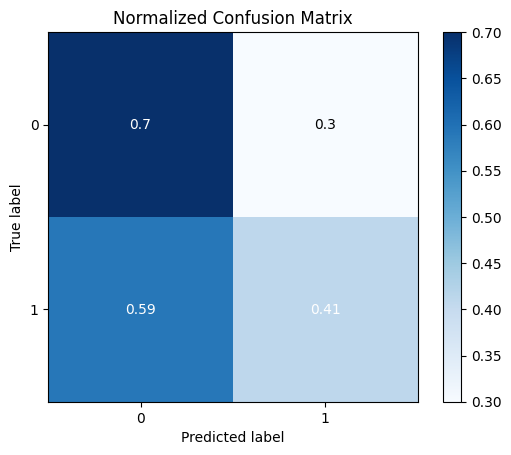

In [ ]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb, digits=3))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_nb, normalize=True);

aa = 'Naive Bayes'
a = accuracy_score(y_test, y_pred_nb)
b = recall_score(y_test, y_pred_nb)
c = roc_auc_score(y_test, y_pred_nb)

details = {
'Modelo':[aa],
'Accuracia' : [a],
'Recall' : [b],
'ROC AUC' : [c],
}
# creating a Dataframe object
result_NB = pd.DataFrame(details)
result_NB

## Random Forest

Considerando todos os dados

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_rus, y_rus)

y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[0 0 0 ... 0 0 0]


------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    114716
           1       0.03      0.04      0.04      4327

    accuracy                           0.92    119043
   macro avg       0.50      0.50      0.50    119043
weighted avg       0.93      0.92      0.93    119043

0.4979237236974964
[[109388   5328]
 [  4144    183]]


,Modelo,Accuracia,Recall,ROC AUC
0,RandomForest,0.920432,0.042293,0.497924


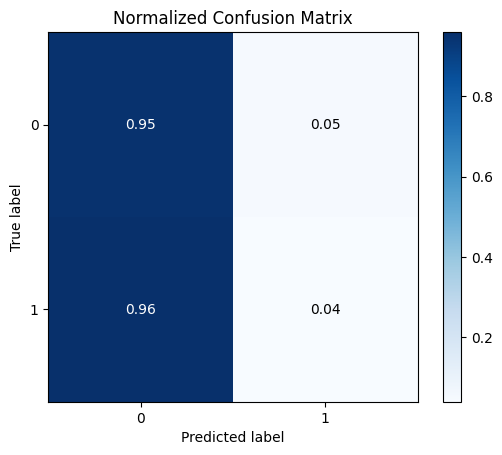

In [ ]:
  #Models metrics
print('------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True);
aa = 'RandomForest'
a = accuracy_score(y_test, y_pred_rf)
b = recall_score(y_test, y_pred_rf)
c = roc_auc_score(y_test, y_pred_rf)

details = {
'Modelo':[aa],
'Accuracia' : [a],
'Recall' : [b],
'ROC AUC' : [c],
}

# creating a Dataframe object
result_RF = pd.DataFrame(details)
result_RF

In [ ]:
# Filtrando dados binarios e categóricos
df_rf = df.copy()
df_rf = df_rf.drop(columns=['id', 'target'], axis=1)

In [ ]:
df_rf.head(3)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0


In [ ]:
XX = df_rf
yy = df.target
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [ ]:
#Aplicando UnderSampling
seed = 6
np.random.seed(seed)

### SMOTE
rus = SMOTE(random_state=seed)
X_rus, y_rus = rus.fit_resample(XX_train, yy_train)

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_rus, y_rus)

y_pred_rf1 = rf1.predict(XX_test)
print(y_pred_rf1)

[0 0 0 ... 0 0 0]


------------------------------------------------------
0.4999802794620014
[[114392    266]
 [  4375     10]]


,Modelo,Accuracia,Recall,ROC AUC
0,RandomForest,0.961014,0.002281,0.49998


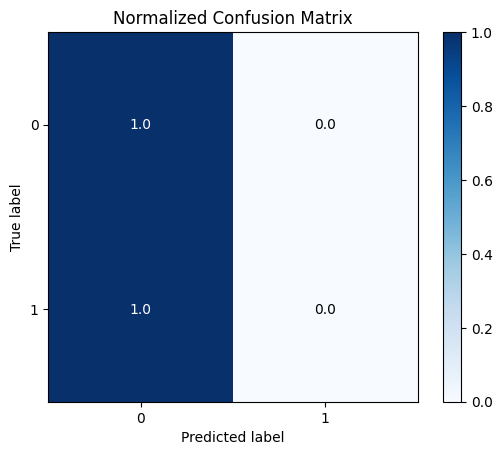

In [ ]:
  #Models metrics
print('------------------------------------------------------')
#print(classification_report(yy_test, y_pred_rf1))
print(roc_auc_score(yy_test, y_pred_rf1))
print(confusion_matrix(yy_test, y_pred_rf1))

skplt.metrics.plot_confusion_matrix(yy_test, y_pred_rf1, normalize=True);
aa = 'RandomForest'
a = accuracy_score(yy_test, y_pred_rf1)
b = recall_score(yy_test, y_pred_rf1)
c = roc_auc_score(yy_test, y_pred_rf1)

details = {
'Modelo':[aa],
'Accuracia' : [a],
'Recall' : [b],
'ROC AUC' : [c],
}

# creating a Dataframe object
result_RF1 = pd.DataFrame(details)
result_RF1

# Questão 2

Usando a base de dados London bike sharing para estimar o uso de bicicletas

compartilhadas na cidade de Londres, pede-se:

(a) Transforme a coluna ‘timestamp’ em atributo numérico para representar apenas o horário do registro;

(b) Crie bases de treinamento e teste;

(c) Crie um modelo de regressão linear para estimar o valor da coluna ‘cnt’ (quantidade de bicicletas). Qual o erro médio quadrático entre as predições e o valor real na base de testes?

(d) Codifique duas arquiteturas de Rede Neural (a primeira com uma camada escondida e a segunda com duas) para estimar o valor da coluna ‘cnt’ (quantidade de bicicletas). Qual o erro médio quadrático entre as predições e o valor real na base de testes?

(e) Discuta os resultados obtidos com cada uma das redes. A rede mais profunda gerou os melhores resultados? Justifique as funções de ativação escolhidas;

## Transforma a coluna 'timestamp' em atributo numerico (horário)

In [ ]:
df = pd.read_csv('london.csv')

In [ ]:
# extraindo horas do timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['horas'] = dfx['timestamp'].dt.hour

In [ ]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,horas
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4


## Criar bases de treinamento e teste

In [ ]:
df1 = df.copy()
# Filtrando dados binarios e categóricos
df1 = df1.drop(columns=['timestamp','cnt'], axis=1)

In [ ]:
df1.columns

Index(['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'horas'],
      dtype='object')

In [ ]:
# Criando base de treinamento e teste
X = df1
y = df.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão Linear

In [ ]:
#treinando o modelo
model_lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# Predisao Modelo
yhat = model_lr.predict(X_test)

In [ ]:
def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y,yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))

    return pd.DataFrame({'Modelo Name': model_name,
                     'MAE': mae,
                     'MAPE': mape,
                     'RMSE': rmse}, index=[0])

In [ ]:
# Performace
lr_result = ml_error('Linear Regression', y_test, yhat)
lr_result

,Modelo Name,MAE,MAPE,RMSE
0,Linear Regression,669.002115,2.177909,922.302938
